In [3]:
!pip install -Uqq fastbook fastai

In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
urls=search_images_ddg('bird image', max_images=1)
len(urls), urls[0]

(1,
 'http://www.pixelstalk.net/wp-content/uploads/2016/05/Lorikeet-Bird-Full-HD-Image.jpeg')

In [7]:
dest= Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

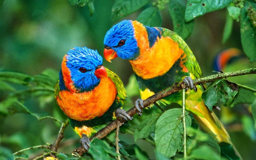

In [8]:
im= Image.open(dest)
im.to_thumb(256,256)

In [ ]:
# searches= 'forest', 'bird'
# path= Path('bird_or_not')

# if not path.exists():
#   for i in searches:
#     dest= (path/i )
#     dest.mkdir(parent=True, exist_ok= True)
#     results= search_images_ddg(f'{i} photo')
#     download_images(dest, urls= results[:100])
#     resize_images(dest, max_size=400, dest=dest)

In [9]:
from pathlib import Path
#from some_module import search_images_ddg, download_images, resize_images  # Make sure to import the actual functions

searches = ['forest', 'bird']
path = Path('bird_or_not')

if not path.exists():
    path.mkdir(parents=True, exist_ok=True)  # Create the base directory

for i in searches:
    dest = (path / i)
    dest.mkdir(parents=True, exist_ok=True)  # Create the directory for each search term
    results = search_images_ddg(f'{i} photo')  # Replace with your actual function call
    download_images(dest, urls=results[:100])  # Download images
    resize_images(dest, max_size=400, dest=dest)  # Resize images

In [10]:
failed= verify_images (get_image_files(path))
failed.map(Path.unlink);

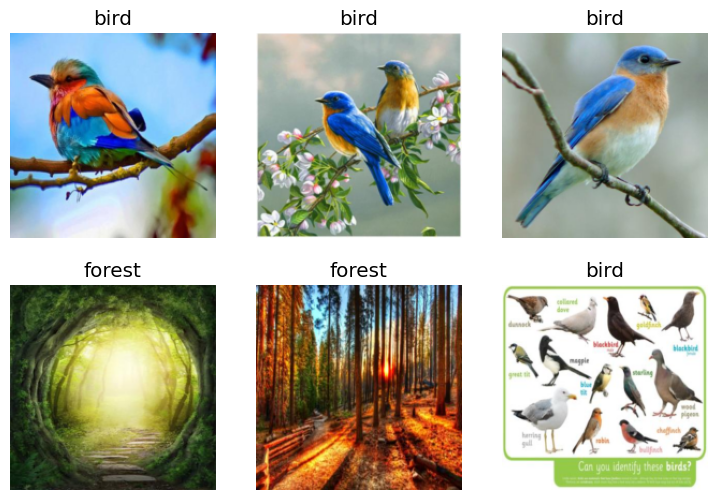

In [11]:
dls= DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y= parent_label,
    item_tfms= [Resize(192, method= 'squish')]
).dataloaders(path, bs=32)
dls.show_batch(max_n=6)

In [12]:
learn= cnn_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.813628,0.432613,0.189189,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.120901,0.038463,0.000000,00:28
1,0.059749,0.004007,0.000000,00:34
2,0.048801,0.002967,0.000000,00:31


In [13]:
is_bird, _, probs= learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [14]:
learn= vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.825960,0.645317,0.189189,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.097137,0.138544,0.054054,00:29
1,0.080927,0.027233,0.027027,00:32
2,0.067330,0.017777,0.000000,00:29


In [17]:
# path= untar_data(URLS.CAMVID_TINY)
# dls= SegmentationDataLoaders.from_label_func(
#     path, bs=8, fnames= get_image_files(path/"images"),
#     label_func= lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
#     codes= np.loadtxt(path/'codes/.txt', dtype=str)
# )
# learn=unet_learner(dls, resnet34)
# learn.fine_tune(8)

In [16]:
from fastai.vision.all import *
import numpy as np

# Download the CamVid tiny dataset
path = untar_data(URLs.CAMVID_TINY)

# Load the data with a DataLoader for segmentation tasks
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8,
    fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)  # Correct the path to 'codes.txt'
)

# Create a learner with a pretrained ResNet34 model
learn = unet_learner(dls, resnet34)

# Fine-tune the model for 8 epochs
learn.fine_tune(8)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 97.9MB/s]


epoch,train_loss,valid_loss,time
0,3.070786,2.076123,01:27


epoch,train_loss,valid_loss,time
0,1.875843,1.568940,01:36
1,1.654564,1.406266,02:10
2,1.527664,1.354069,01:26
3,1.404931,0.967172,02:03
4,1.266533,0.805453,01:45
5,1.143833,0.770259,01:30
6,1.044190,0.726511,01:28
7,0.963615,0.714146,01:26


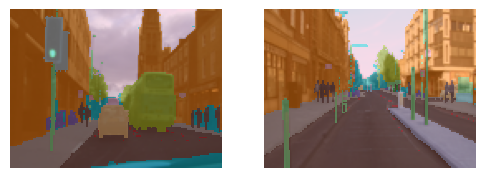

In [18]:
dls.show_batch(max_n=2, figsize=(6,6))

In [20]:
# tabular analysis
from fastai.tabular.all import *
path= untar_data(URLs.ADULT_SAMPLE)
# which data are categorical and which is continuous: cat or cont
dls= TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                 cat_names= ['workclass', 'education','marital-status', 'occupation', 'relationship' ],
                                 cont_names= ['age', 'fnlwgt', 'education-num'],
                                 procs= [Categorify, FillMissing, Normalize])

In [21]:
learn= tabular_learner(dls, metrics= accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.370942,0.354951,0.842598,00:05
1,0.362118,0.344653,0.844748,00:06


In [22]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,education-num_na,age,fnlwgt,education-num,salary
0,Self-emp-inc,Masters,Divorced,Sales,Not-in-family,False,46.000000,235319.999874,14.0,>=50k
1,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,False,44.000000,286749.999861,13.0,>=50k
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,False,33.000000,199226.999738,13.0,>=50k
3,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,False,73.999999,188709.000012,15.0,>=50k
4,Private,11th,Never-married,Other-service,Own-child,False,19.000000,321816.996446,7.0,<50k
5,Private,HS-grad,Never-married,Other-service,Own-child,False,20.999999,216128.999718,9.0,<50k
6,Private,Assoc-acdm,Never-married,Handlers-cleaners,Not-in-family,False,21.999999,433669.002099,12.0,<50k
7,Private,11th,Never-married,#na#,Unmarried,False,24.000001,223367.000117,7.0,<50k
8,Private,Some-college,Never-married,Sales,Not-in-family,False,54.000000,133050.000230,10.0,<50k
9,Private,Bachelors,Divorced,Sales,Not-in-family,False,51.000000,177704.999838,13.0,>=50k


**Collaborative Filtering- recommnedation system**

In [28]:
from fastai.collab import *
from fastai.data.all import URLs, untar_data  # Import URLs and untar_data

# Download the ML_SAMPLE dataset
path = untar_data(URLs.ML_SAMPLE)

# Load the data from the CSV file
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
dls.show_batch()

,userId,movieId,rating
0,460,2762,4.0
1,176,5952,5.0
2,88,527,4.0
3,213,587,2.5
4,480,165,5.0
5,529,1265,4.0
6,199,1136,5.0
7,574,150,3.0
8,150,5952,4.5
9,534,165,4.0


In [29]:
learn= collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,1.527400,1.321158,00:01


epoch,train_loss,valid_loss,time
0,1.355993,1.228472,00:00
1,1.154084,0.944528,00:00
2,0.908367,0.762426,00:00
3,0.776503,0.710828,00:00
4,0.722881,0.704178,00:01


In [31]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,35.0,72.0,2.5,2.915192
1,36.0,12.0,3.5,2.950056
2,32.0,11.0,4.0,3.510768
3,49.0,48.0,5.0,3.586482
4,44.0,90.0,4.5,3.749814
5,91.0,32.0,4.0,3.152417
6,4.0,96.0,3.5,3.848958
7,20.0,46.0,4.0,3.429779
8,41.0,40.0,4.0,3.323895


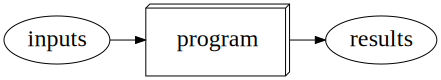

In [34]:
gv2('''program[shape=box3d width=2 height=1]
inputs->program->results''')

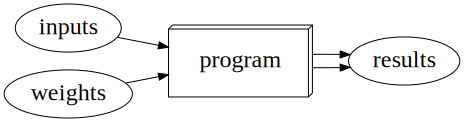

In [33]:
gv2('''program[shape=box3d width=2 height=1]
inputs->program->results
weights->program->results''')

In [36]:
!git clone https://github.com/Raziyeh71/Deep-Learning-Fastai.git

fatal: destination path 'Deep-Learning-Fastai' already exists and is not an empty directory.


In [37]:
!mv /content/DL-Fastai.ipynb /content/repository/


mv: cannot stat '/content/DL-Fastai.ipynb': No such file or directory
